In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [3]:
# 問題1
df = pd.read_csv("data/train.csv")

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 問題2
販売価格の予想を目的とした Ames, Iowaの住居の情報。79個の特徴量で示されている。
価格を決める上で、ベットの数や白い囲い柵などのよくある指標以上にどんな要素が価格に影響しているのか調べることができる。

### 問題3 データの種類

以下より81種のカラムの1460のデータで構成されている。

In [4]:
pd.set_option('display.max_rows', 100)
print(df.shape)
df.dtypes

(1460, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### 目的値

predict sales priceとあるので、`SalePrice`を目的変数とする

In [5]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### 特徴量の平均値と標準偏差、四分位数

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# 問題4
import missingno as msno

<AxesSubplot:>

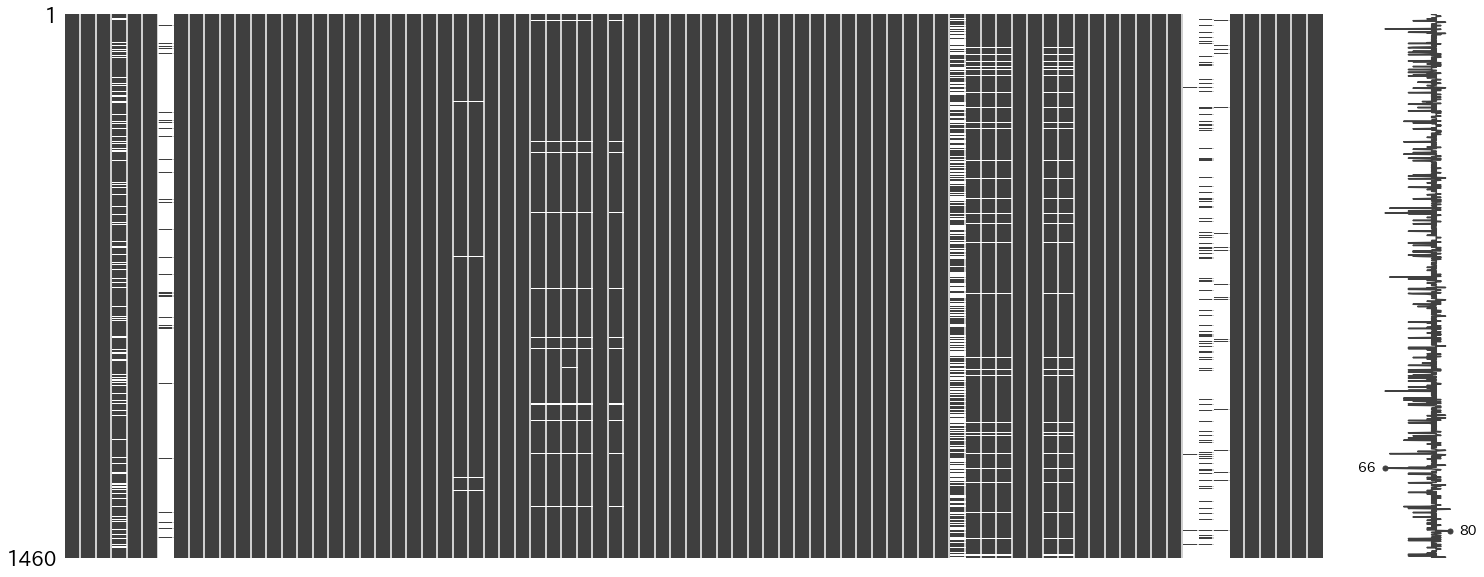

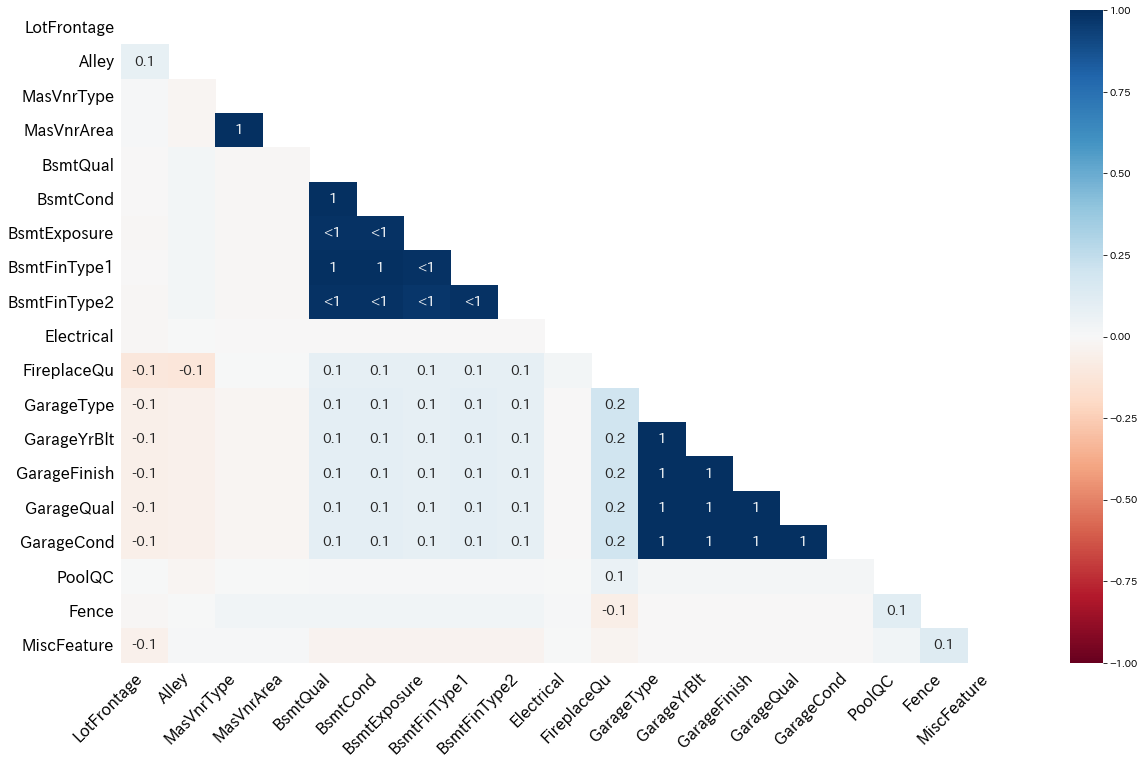

In [8]:
msno.matrix(df)
msno.heatmap(df)

In [9]:
# 問題4 欠損値が何パーセント含まれるかを確認
pd.DataFrame([df.isnull().sum(), df.isnull().sum() / len(df)], index=["total", "missing_ratio"])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
total,0.0,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,...,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
missing_ratio,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 問題4
print(df.shape)
print("5つ以上欠損のあるカラム数: {}".format((df.isnull().sum() >= 5).sum()))
# 5つ以上欠損値がある特徴量（列）は削除
df_preprocessed = df.loc[:, df.isnull().sum() < 5]
# 削除確認
print(df_preprocessed.shape)
# 欠損値があるサンプル（行）は削除
df_preprocessed = df_preprocessed.dropna()
# 削除確認
print(df_preprocessed.shape)

(1460, 81)
5つ以上欠損のあるカラム数: 18
(1460, 63)
(1459, 63)


In [11]:
# 問題5

 ### 尖度とは
 
データの 分布が正規分布よりどれだけ尖ってるかを示す値。
尖度が0なら正規分布の尖りと同じ。正なら正規分布より尖っている。負なら正規分布より潰れている。

### 歪度

データの非対称性を示す値。データが左右対象であれば0に近づく。正なら右寄りに歪んでおり。負なら左寄りに歪んでいる。

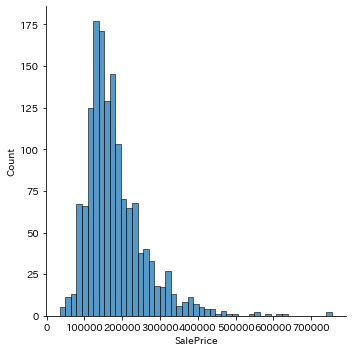

In [12]:
# 問題6 分布
sns.displot(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

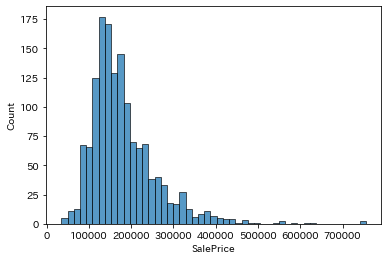

In [13]:
sns.histplot(df["SalePrice"])

In [14]:
# 問題6 歪度, 尖度
print("歪度(Skewness) :", df["SalePrice"].skew())
print("尖度(Kurtosis) :", df["SalePrice"].kurt())

歪度(Skewness) : 1.8828757597682129
尖度(Kurtosis) : 6.536281860064529


In [15]:
# 問題6 目的変数に対して対数変換を行う
y_logarithm = df["SalePrice"].apply(np.log)
print(y_logarithm)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


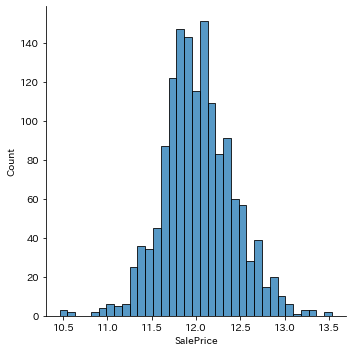

In [16]:
# 問題6 対数変換後、分布
sns.displot(y_logarithm)

In [17]:
# 問題6 対数変換後、歪度, 尖度
print("歪度(Skewness) :", y_logarithm.skew())
print("尖度(Kurtosis) :", y_logarithm.kurt())

歪度(Skewness) : 0.12133506220520406
尖度(Kurtosis) : 0.8095319958036296


<AxesSubplot:>

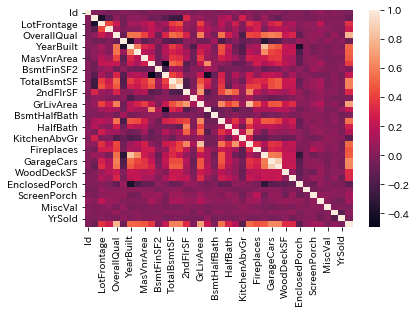

In [18]:
# 問題7 相関係数の確認
sns.heatmap(df.corr())

In [19]:
# 以下の結果より負の相関より正の相関の方が関連が強いため、全て正の相関を使う
print("負の相関が高いtop 10: {}".format(df.corr()["SalePrice"].sort_values(ascending=True).head(10)))
# 問題7 目的変数との相関の高い特徴量10個 (最初の一つはSalePriceのためそれを省いたもの)
print("正の相関が高いtop 11: {}".format(df.corr()["SalePrice"].sort_values(ascending=False).head(11)))

負の相関が高いtop 10: KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64
正の相関が高いtop 11: SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [20]:
top10_sale_price_corrs = df.corr()["SalePrice"].sort_values(ascending=False)[1:11]

<AxesSubplot:>

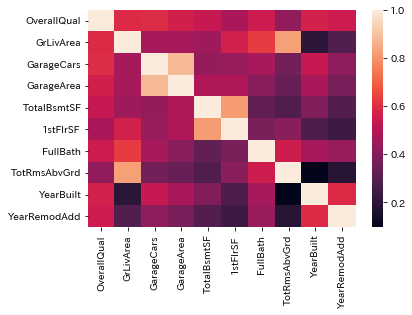

In [21]:
# 問題7 選んだ10個の相関係数行列ヒートマップ
top10_corrs = df.loc[:, top10_sale_price_corrs.index].corr()
sns.heatmap(top10_corrs)

In [22]:
top10_corrs

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


In [23]:
# 問題7 選んだ10個の特徴量が何か表しているか
print(df.loc[:, top10_sale_price_corrs.index].dtypes)
df.loc[:, top10_sale_price_corrs.index].head()

OverallQual     int64
GrLivArea       int64
GarageCars      int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
FullBath        int64
TotRmsAbvGrd    int64
YearBuilt       int64
YearRemodAdd    int64
dtype: object


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


 - OverallQual: 全体的な素材と仕上がり, 10段階で評価 10が最も良い値
 - GrLivArea: 土地面積(平方フィート)
 - GarageCars: 車庫に入る車の台数
 - GarageArea: 車庫のサイズ(平方フィート)
 - TotalBsmtSF: 地下のサイズ(平方フィート)
 - 1stFlrSF: 一階フロア全体のサイズ(平方フィート)
 - FullBath: 一階より上に位置する浴槽・シャワー・洗面台・便器の4点が備え付けられたバスルームの数
 - TotRmsAbvGrd: バスルームと地下を除いた部屋数
 - YearBuilt: 建築した年
 - YearRemodAdd: リフォームした年

In [24]:
# 問題7 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ
# 関数

# 相関関数の対角線で分けた上での下半分を対象に相関の高い
def search_top_high_corr_pair_columns(corr, n_top=3):
    result = []
    for i in range(len(corr) -1):
        for k in range(len(corr) - i -1):
            target = corr.iloc[i, k + i +1]
            # 現在の相関高いものの中で一番低いものがtargetより低い場合は入れ替える
            if len(result) == n_top and result[-1].get('value') < target:
                result[-1] = {'row': i, 'column': k + i +1, 'value': target}
            elif len(result) < n_top :
                result.append({'row': i, 'column': k + i +1, 'value': target})
            # 相関の高い順に並べる
            result.sort(key=lambda r: r.get('value'), reverse=True)

    return result

print(search_top_high_corr_pair_columns(top10_corrs))

[{'row': 2, 'column': 3, 'value': 0.882475414281462}, {'row': 1, 'column': 7, 'value': 0.8254893743088425}, {'row': 4, 'column': 5, 'value': 0.8195299750050339}]


In [25]:
# 関数使って相関高い3つを出力
print('相関の高いtop 3')
for pair_column in search_top_high_corr_pair_columns(top10_corrs):
    print('{}と{}のペアで相関度は{}'.format(top10_corrs.index[pair_column.get('row')], top10_corrs.columns[pair_column.get('column')], pair_column.get('value')))

相関の高いtop 3
GarageCarsとGarageAreaのペアで相関度は0.882475414281462
GrLivAreaとTotRmsAbvGrdのペアで相関度は0.8254893743088425
TotalBsmtSFと1stFlrSFのペアで相関度は0.8195299750050339
